In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"])

In [3]:
df

,DATE,TAG,POSTS
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0
...,...,...,...
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0


In [4]:
df.head()

,DATE,TAG,POSTS
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0


In [5]:
df.tail()

,DATE,TAG,POSTS
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0
1991,2020-07-01 00:00:00,swift,3607.0


In [6]:
df.shape

(1992, 3)

In [7]:
df.count()

DATE     1992
TAG      1992
POSTS    1991
dtype: int64

In [8]:
# Find number of posts per languages 
df[["TAG", "POSTS"]].groupby("TAG").sum().sort_values(by="POSTS")

,POSTS
TAG,
TagName,0.0
assembly,34852.0
delphi,46212.0
go,47499.0
perl,65286.0
ruby,214582.0
swift,273055.0
c,336042.0
r,356799.0


In [9]:
# Number of month a given language has been posted
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
TagName,1,0
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144


In [10]:
df['DATE'] = pd.to_datetime(df['DATE'][1:], format='%Y-%m-%d')

In [11]:
df.drop([0], inplace=True)

In [12]:
df.dtypes

DATE     datetime64[ns]
TAG              object
POSTS           float64
dtype: object

In [13]:
df

,DATE,TAG,POSTS
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,javascript,162.0
4,2008-08-01,c,85.0
5,2008-08-01,python,124.0
...,...,...,...
1987,2020-07-01,r,5694.0
1988,2020-07-01,go,743.0
1989,2020-07-01,ruby,775.0
1990,2020-07-01,perl,182.0


In [14]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [15]:
pivot_test_df = test_df.pivot(index='Age', columns='Actor', values='Power')

In [16]:
pivot_test_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [17]:
reshaped_df = df.pivot(index='DATE',columns='TAG', values='POSTS') # pivot the table such that the index is the Date, the columns are the TAGS 
                                                     # The rows are the number of posts for a given language

In [18]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [19]:
reshaped_df.shape

(145, 14)

In [20]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [21]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [22]:
reshaped_df.fillna(0, inplace=True)

In [23]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

<Axes: title={'center': 'Java Popularity over the years'}, xlabel='DATE'>

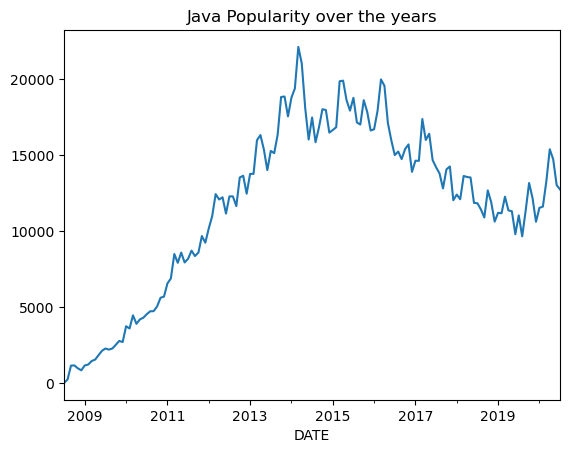

In [24]:
reshaped_df['java'].plot(title="Java Popularity over the years")

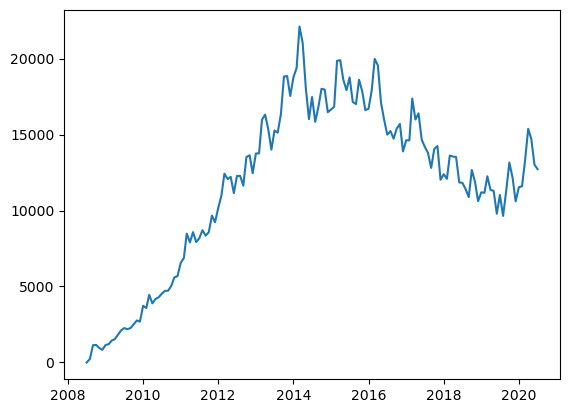

In [25]:
plt.plot(reshaped_df.index, reshaped_df.java)

<Axes: title={'center': 'Java Popularity over the years'}, xlabel='Year', ylabel='Number of posts'>

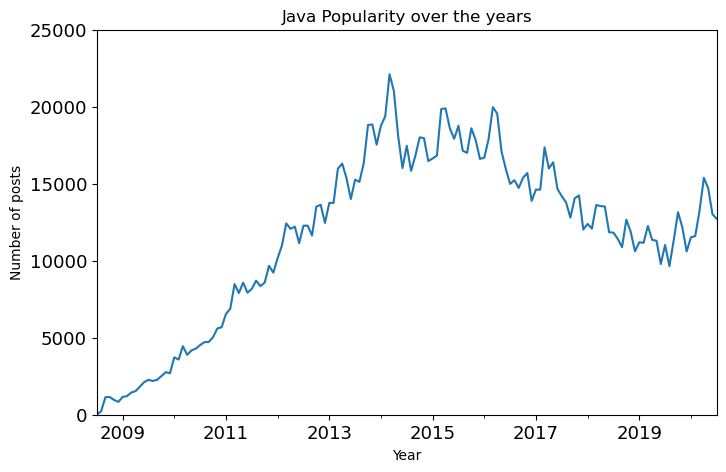

In [26]:
plt.figure(figsize=(8,5))
plt.ylabel("Number of posts")
plt.ylim(0, 25000)

reshaped_df['java'].plot(title="Java Popularity over the years",xlabel="Year", fontsize=13)

<Axes: xlabel='DATE', ylabel='Number of Posts'>

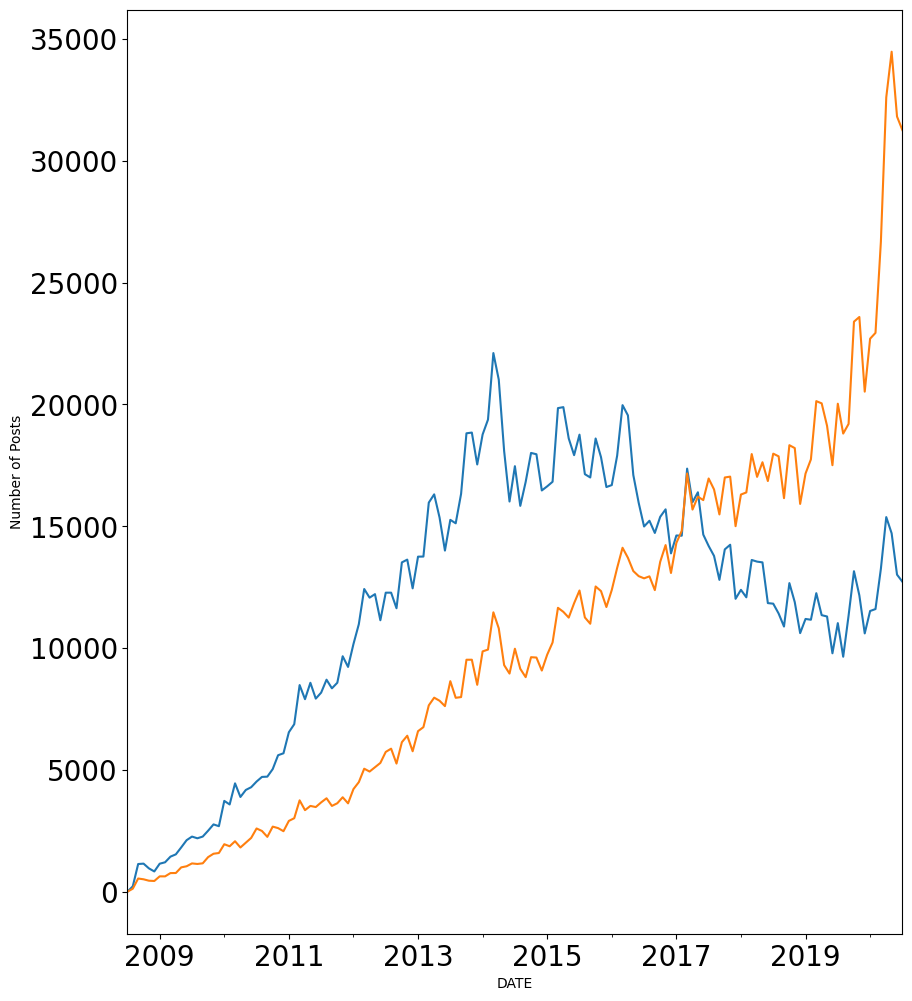

In [27]:
plt.figure(figsize=(10,12))
plt.ylabel("Number of Posts")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

reshaped_df['java'].plot()
reshaped_df['python'].plot()

In [28]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

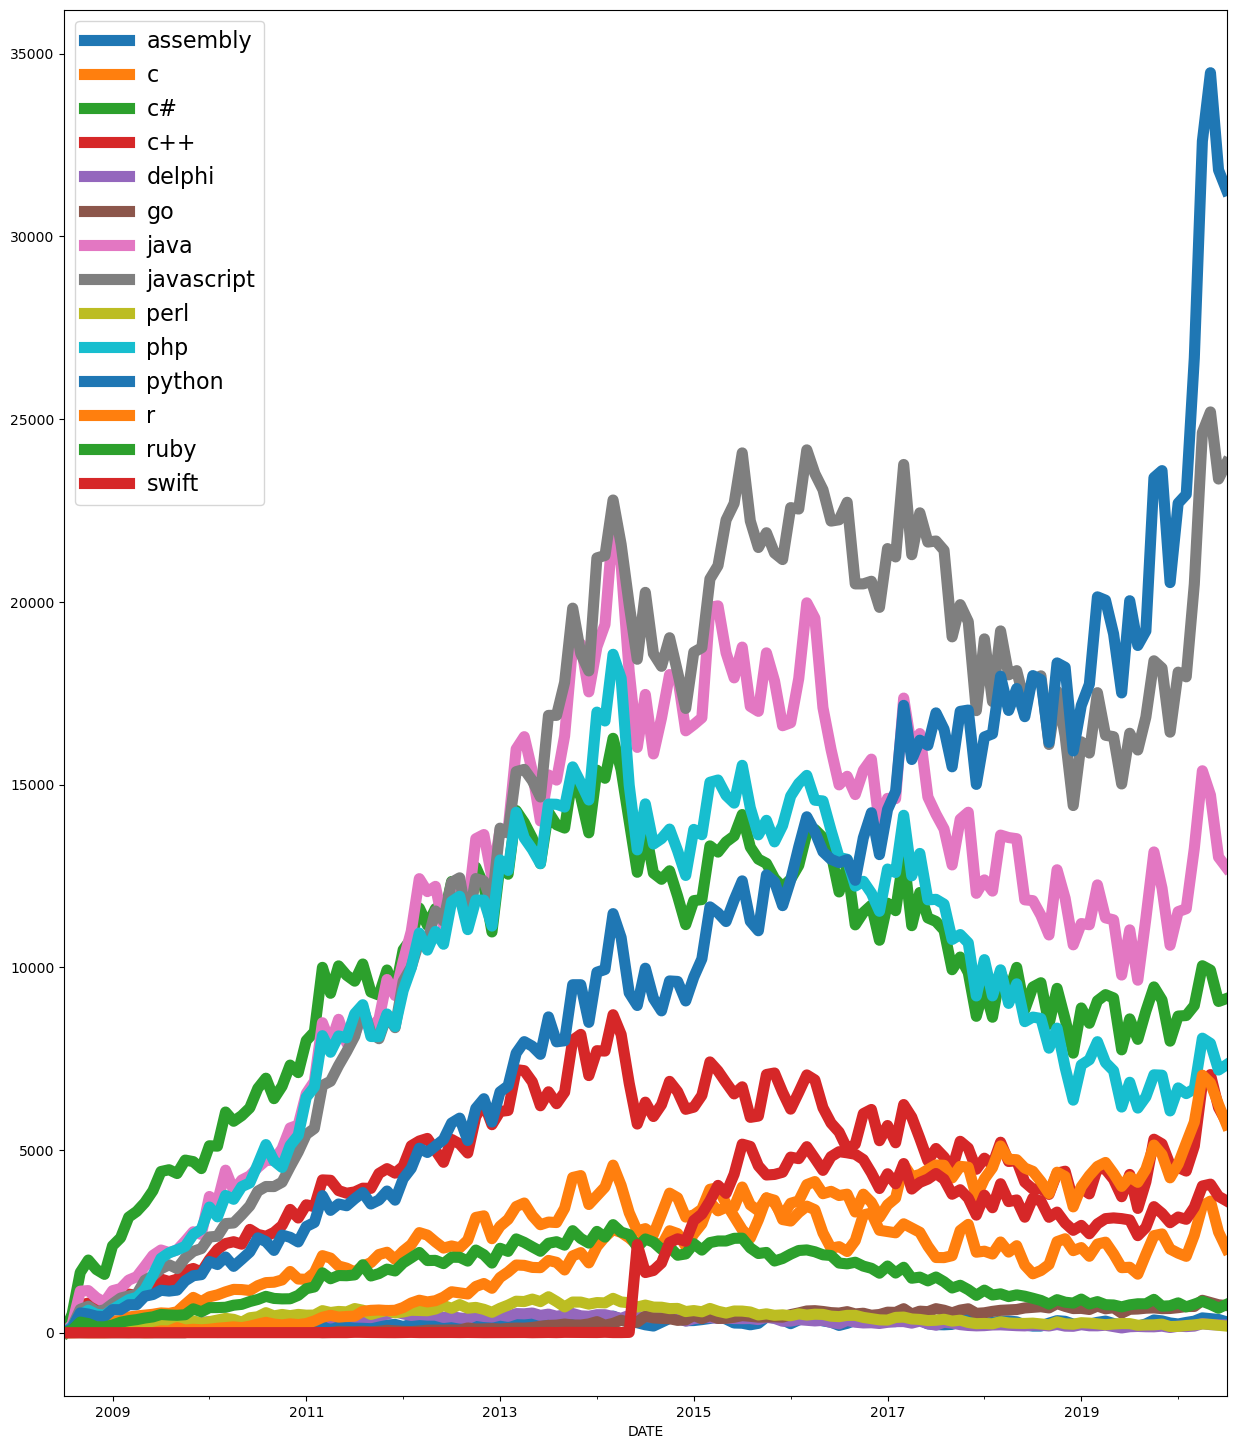

In [29]:
plt.figure(figsize=(15,18))

for col in reshaped_df.columns:
    reshaped_df[col].plot(legend=True,linewidth=8)
    
plt.legend(fontsize=16)

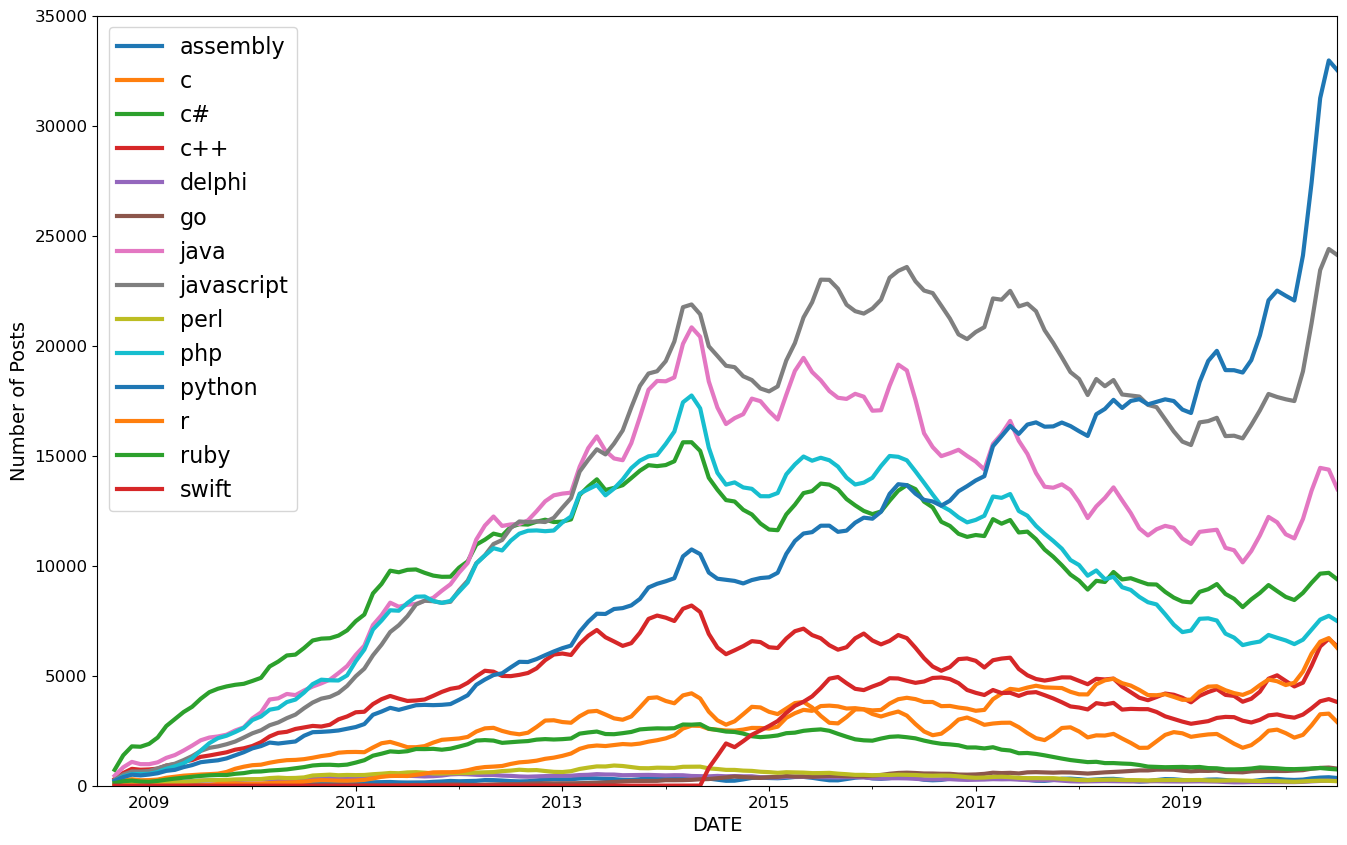

In [30]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,35000)

for col in roll_df.columns:
    roll_df[col].plot(linewidth=3)
    
plt.legend(fontsize=16)